In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *

In [4]:
data=pd.read_csv("C:/Users/vikas/Desktop/projects/deepai/patient_mortality/research/gossis-1-eicu-only-24hr.csv")

In [5]:
data.head()

,patientunitstayid,data_source,encounter_id,hospital_id,patient_id,age,bmi,country,elective_surgery,ethnicity,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,146513.0,eicu,eicu_146513,73.0,eicu_002-35357,62.0,NaN,USA,0.0,Caucasian,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
1,190523.0,eicu,eicu_190523,56.0,eicu_002-6897,60.0,21.044822,USA,0.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,210925.0,eicu,eicu_210925,73.0,eicu_002-65890,82.0,NaN,USA,0.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
3,255589.0,eicu,eicu_255589,79.0,eicu_003-42506,67.0,18.491950,USA,0.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
4,312464.0,eicu,eicu_312464,122.0,eicu_004-54157,68.0,22.201938,USA,0.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular


In [6]:
df=data[['age', 'height', 'icu_death','hospital_los_days' ,'icu_los_days', 'weight', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_potassium_max', 'd1_potassium_min']]

In [7]:
df.head()

,age,height,icu_death,hospital_los_days,icu_los_days,weight,bun_apache,creatinine_apache,gcs_eyes_apache,glucose_apache,...,d1_sysbp_max,d1_sysbp_min,h1_heartrate_max,h1_heartrate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_potassium_max,d1_potassium_min
0,62.0,170.20,0.0,14.367361,0.166667,NaN,NaN,NaN,4.0,323.0,...,110.0,80.0,110.0,102.0,100.0,99.0,110.0,80.0,NaN,NaN
1,60.0,182.90,0.0,2.972222,0.166667,70.4,NaN,NaN,4.0,185.0,...,124.0,83.0,104.0,94.0,97.0,94.0,124.0,101.0,NaN,NaN
2,82.0,NaN,1.0,0.168056,0.166667,NaN,NaN,NaN,4.0,103.0,...,139.0,77.0,97.0,86.0,100.0,96.0,139.0,77.0,NaN,NaN
3,67.0,175.26,0.0,34.101389,0.166667,56.8,NaN,NaN,4.0,79.0,...,104.0,86.0,69.0,69.0,100.0,96.0,98.0,98.0,3.9,3.9
4,68.0,193.00,0.0,4.148611,0.166667,82.7,NaN,NaN,4.0,71.0,...,129.0,103.0,106.0,103.0,94.0,93.0,128.0,124.0,4.2,4.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130754 entries, 0 to 130753
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 35196 non-null  float64
 1   height              35775 non-null  float64
 2   icu_death           36999 non-null  float64
 3   hospital_los_days   36999 non-null  float64
 4   icu_los_days        36999 non-null  float64
 5   weight              35387 non-null  float64
 6   bun_apache          26657 non-null  float64
 7   creatinine_apache   26825 non-null  float64
 8   gcs_eyes_apache     36079 non-null  float64
 9   glucose_apache      30148 non-null  float64
 10  heart_rate_apache   36488 non-null  float64
 11  hematocrit_apache   25973 non-null  float64
 12  map_apache          36435 non-null  float64
 13  resprate_apache     36300 non-null  float64
 14  sodium_apache       26915 non-null  float64
 15  temp_apache         34228 non-null  float64
 16  ur

In [12]:
df.mean()

age                     60.318559
height                 169.435677
icu_death                0.057893
hospital_los_days        3.918902
icu_los_days             0.707497
weight                  83.413845
bun_apache              22.585186
creatinine_apache        1.351332
gcs_eyes_apache          3.664375
glucose_apache         155.429448
heart_rate_apache       94.528777
hematocrit_apache       34.142275
map_apache              86.590247
resprate_apache         23.782160
sodium_apache          138.136288
temp_apache             36.458278
urineoutput_apache    1864.964366
ventilated_apache        0.187873
wbc_apache              11.389572
d1_heartrate_max        98.797676
d1_heartrate_min        68.613108
d1_spo2_max             98.978081
d1_spo2_min             90.534855
d1_sysbp_max           146.260423
d1_sysbp_min           100.518675
h1_heartrate_max        89.740251
h1_heartrate_min        81.125439
h1_spo2_max             97.952827
h1_spo2_min             95.220407
h1_sysbp_max  

In [12]:
df.dropna(how='all',inplace=True)

In [13]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display the categorical columns
print(categorical_columns)

Index([], dtype='object')


In [14]:
df.isna().sum()

age                    1803
height                 1224
icu_death                 0
hospital_los_days         0
icu_los_days              0
weight                 1612
bun_apache            10342
creatinine_apache     10174
gcs_eyes_apache         920
glucose_apache         6851
heart_rate_apache       511
hematocrit_apache     11026
map_apache              564
resprate_apache         699
sodium_apache         10084
temp_apache            2771
urineoutput_apache    18931
ventilated_apache       336
wbc_apache            11787
d1_heartrate_max        167
d1_heartrate_min        167
d1_spo2_max             318
d1_spo2_min             318
d1_sysbp_max            159
d1_sysbp_min            159
h1_heartrate_max       1149
h1_heartrate_min       1149
h1_spo2_max            1873
h1_spo2_min            1873
h1_sysbp_max           1635
h1_sysbp_min           1635
d1_potassium_max       6473
d1_potassium_min       6473
dtype: int64

In [15]:
df.fillna(df.mean,inplace=True)

In [16]:
help(setup)

NameError: name 'setup' is not defined

In [21]:
print(df.dtypes)

age                    object
height                 object
icu_death             float64
hospital_los_days     float64
icu_los_days          float64
weight                 object
bun_apache             object
creatinine_apache      object
gcs_eyes_apache        object
glucose_apache         object
heart_rate_apache      object
hematocrit_apache      object
map_apache             object
resprate_apache        object
sodium_apache          object
temp_apache            object
urineoutput_apache     object
ventilated_apache      object
wbc_apache             object
d1_heartrate_max       object
d1_heartrate_min       object
d1_spo2_max            object
d1_spo2_min            object
d1_sysbp_max           object
d1_sysbp_min           object
h1_heartrate_max       object
h1_heartrate_min       object
h1_spo2_max            object
h1_spo2_min            object
h1_sysbp_max           object
h1_sysbp_min           object
d1_potassium_max       object
d1_potassium_min       object
dtype: obj

In [17]:
import pandas as pd

# Convert columns to numeric
numeric_columns = df.columns[df.dtypes == 'object']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [17]:
clf=setup(data=df,target='icu_death')

,Description,Value
0,Session id,7484
1,Target,icu_death
2,Target type,Binary
3,Original data shape,"(36999, 33)"
4,Transformed data shape,"(36999, 33)"
5,Transformed train set shape,"(25899, 33)"
6,Transformed test set shape,"(11100, 33)"
7,Numeric features,32
8,Rows with missing values,72.4%
9,Preprocess,True


In [18]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9825,0.9941,0.8532,0.8468,0.8497,0.8404,0.8406,4.3430
lightgbm,Light Gradient Boosting Machine,0.9824,0.9938,0.8626,0.8391,0.8503,0.8410,0.8413,0.2800
xgboost,Extreme Gradient Boosting,0.9822,0.9936,0.8506,0.8443,0.8471,0.8376,0.8378,0.1140
rf,Random Forest Classifier,0.9810,0.9899,0.8012,0.8608,0.8294,0.8193,0.8202,0.4120
gbc,Gradient Boosting Classifier,0.9810,0.9918,0.8119,0.8537,0.8318,0.8217,0.8223,1.2750
ada,Ada Boost Classifier,0.9783,0.9917,0.7752,0.8386,0.8048,0.7933,0.7944,0.2570
lr,Logistic Regression,0.9777,0.9911,0.7665,0.8355,0.7987,0.7870,0.7882,1.0380
et,Extra Trees Classifier,0.9752,0.9839,0.6764,0.8663,0.7591,0.7463,0.7529,0.2160
qda,Quadratic Discriminant Analysis,0.9741,0.9889,0.8892,0.7263,0.7991,0.7854,0.7903,0.0290
dt,Decision Tree Classifier,0.9692,0.8512,0.7178,0.7430,0.7290,0.7127,0.7135,0.0580


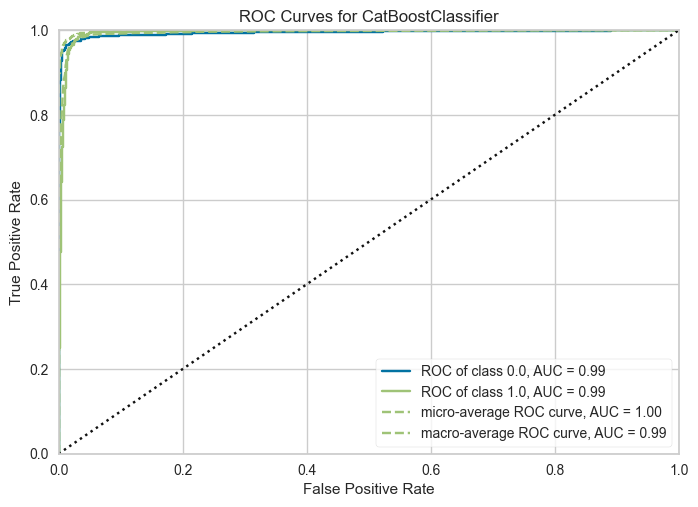

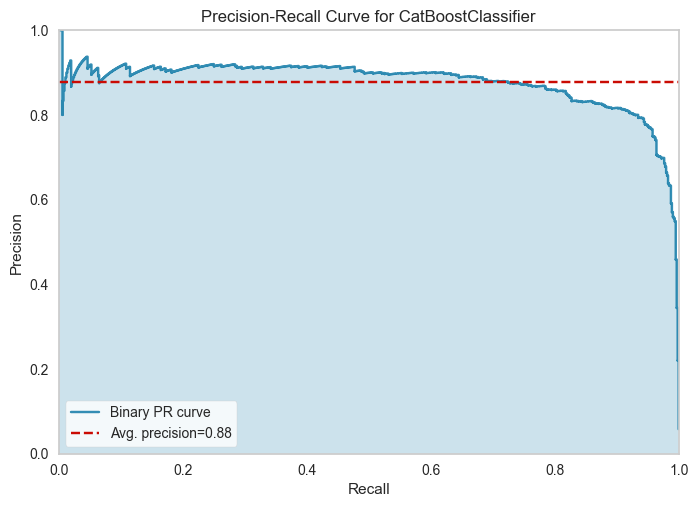

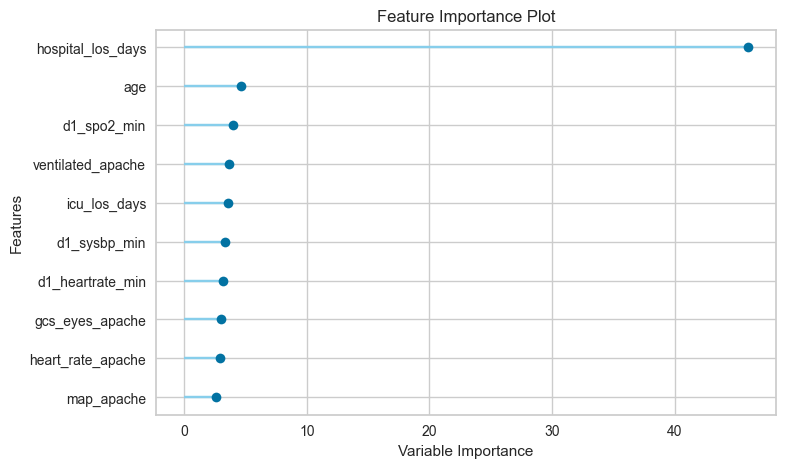

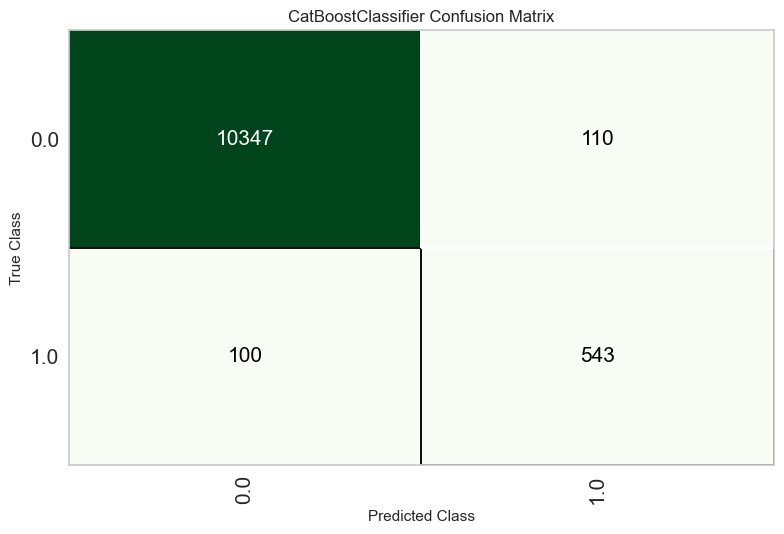

In [19]:
# Plot performance for the best model
plot_model(best_model, plot='auc')  # ROC Curve
plot_model(best_model, plot='pr')   # Precision-Recall Curve
plot_model(best_model, plot='feature')  # Feature Importance
plot_model(best_model, plot = 'confusion_matrix')

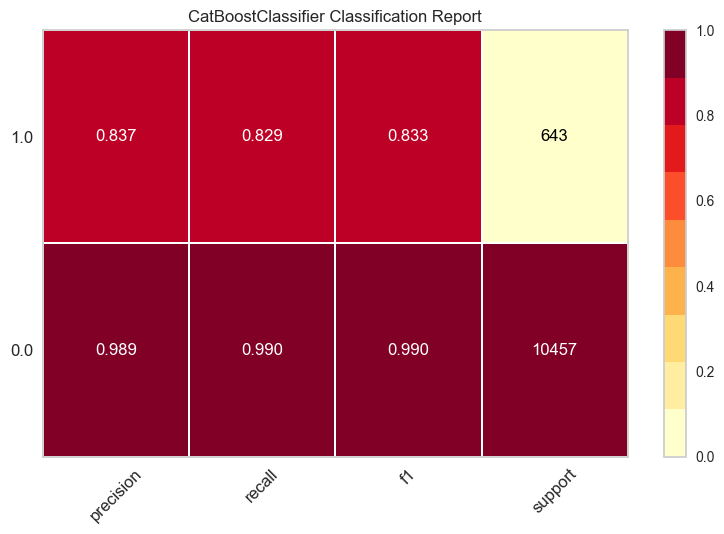

In [33]:
plot_model(best_model, plot = 'class_report')

In [34]:
import shap
import pycaret

In [35]:
lr = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9846,0.9949,0.8867,0.8526,0.8693,0.8611,0.8613
1,0.9788,0.9936,0.8133,0.8188,0.8161,0.8048,0.8048
2,0.9857,0.9947,0.8867,0.8693,0.8779,0.8703,0.8704
3,0.9838,0.9951,0.8733,0.8506,0.8618,0.8532,0.8533
4,0.9838,0.9936,0.8800,0.8462,0.8627,0.8541,0.8543
5,0.9830,0.9943,0.8467,0.8581,0.8523,0.8433,0.8434
6,0.9846,0.9956,0.8467,0.8819,0.8639,0.8558,0.8560
7,0.9807,0.9928,0.8667,0.8125,0.8387,0.8285,0.8289
8,0.9861,0.9941,0.8733,0.8851,0.8792,0.8718,0.8718


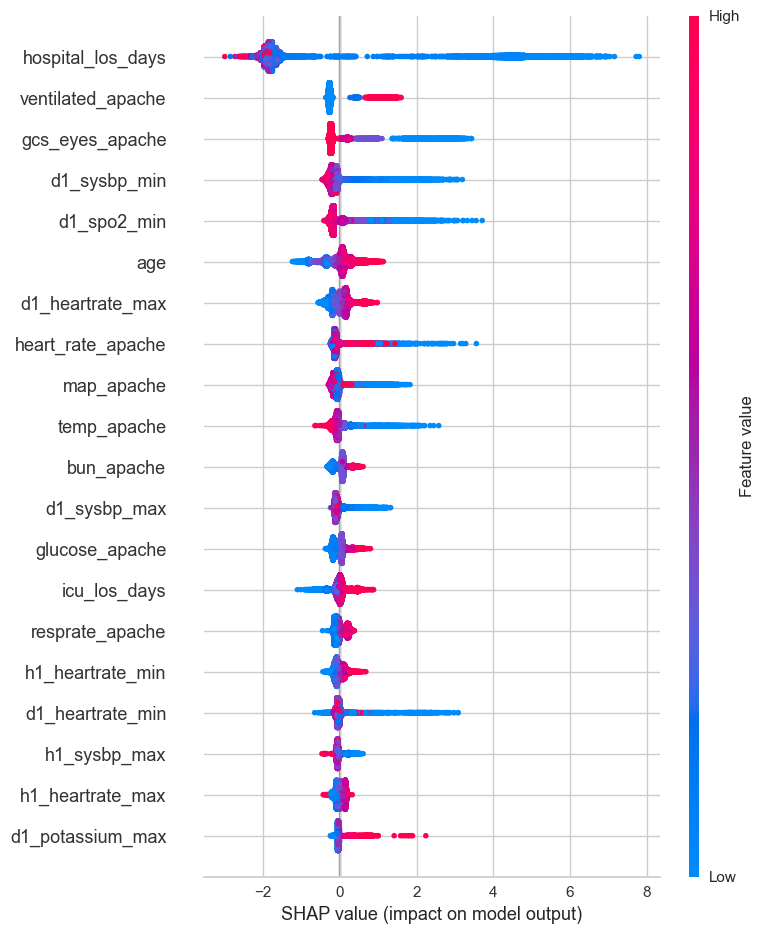

In [36]:

interpret_model(lr)

Cross-validation results:
Accuracy: 0.9828 ± 0.0013
Precision: 0.8445 ± 0.0120
Recall: 0.8516 ± 0.0129

Test set evaluation results:
Accuracy: 0.9807
Precision: 0.8431
Recall: 0.8556
Feature 1: ventilated_apache - Importance: 0.3146
Feature 2: hospital_los_days - Importance: 0.2336
Feature 3: d1_sysbp_min - Importance: 0.1151
Feature 4: gcs_eyes_apache - Importance: 0.0621
Feature 5: d1_spo2_min - Importance: 0.0260
Feature 6: d1_heartrate_min - Importance: 0.0241
Feature 7: heart_rate_apache - Importance: 0.0166
Feature 8: age - Importance: 0.0165
Feature 9: map_apache - Importance: 0.0162
Feature 10: d1_potassium_max - Importance: 0.0125


<Figure size 1000x600 with 0 Axes>

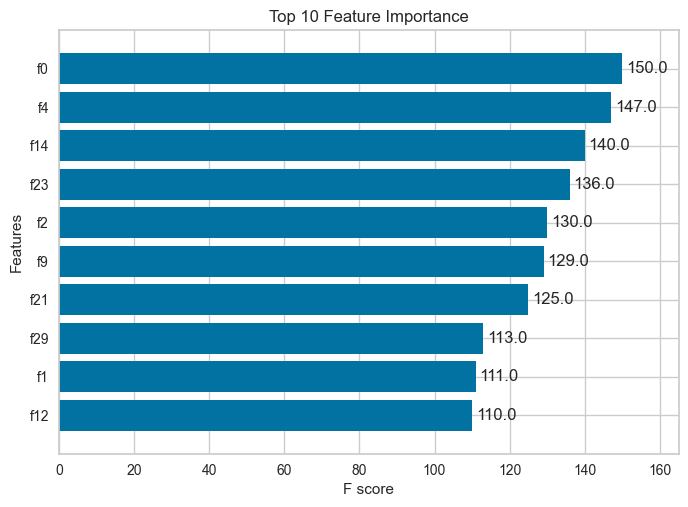

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Assuming 'icu_death' is your target variable
X = df.drop('icu_death', axis=1)
y = df['icu_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cv_results = cross_validate(xgb_model, X_train_scaled, y_train, scoring=scoring, cv=5)

# Print cross-validation results
print("Cross-validation results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"Precision: {cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}")

# Train the model on the entire training set
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation results
print("\nTest set evaluation results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
for i, (importance, name) in enumerate(sorted(zip(feature_importance, feature_names), reverse=True)[:10]):
    print(f"Feature {i+1}: {name} - Importance: {importance:.4f}")

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10, height=0.8)
plt.title("Top 10 Feature Importance")
plt.show()

Learning rate set to 0.039791
0:	learn: 0.5687710	total: 12.3ms	remaining: 12.3s
1:	learn: 0.4725425	total: 21.5ms	remaining: 10.7s
2:	learn: 0.3889085	total: 31.5ms	remaining: 10.5s
3:	learn: 0.3269904	total: 42.2ms	remaining: 10.5s
4:	learn: 0.2861408	total: 51.4ms	remaining: 10.2s
5:	learn: 0.2476841	total: 60.7ms	remaining: 10s
6:	learn: 0.2134751	total: 70.3ms	remaining: 9.97s
7:	learn: 0.1868409	total: 79.2ms	remaining: 9.81s
8:	learn: 0.1671996	total: 87.9ms	remaining: 9.68s
9:	learn: 0.1492238	total: 97ms	remaining: 9.61s
10:	learn: 0.1350182	total: 106ms	remaining: 9.49s
11:	learn: 0.1232939	total: 114ms	remaining: 9.39s
12:	learn: 0.1152876	total: 122ms	remaining: 9.29s
13:	learn: 0.1072852	total: 131ms	remaining: 9.21s
14:	learn: 0.1008574	total: 140ms	remaining: 9.19s
15:	learn: 0.0954213	total: 150ms	remaining: 9.2s
16:	learn: 0.0910214	total: 158ms	remaining: 9.15s
17:	learn: 0.0866464	total: 167ms	remaining: 9.1s
18:	learn: 0.0831911	total: 176ms	remaining: 9.08s
19:	lea

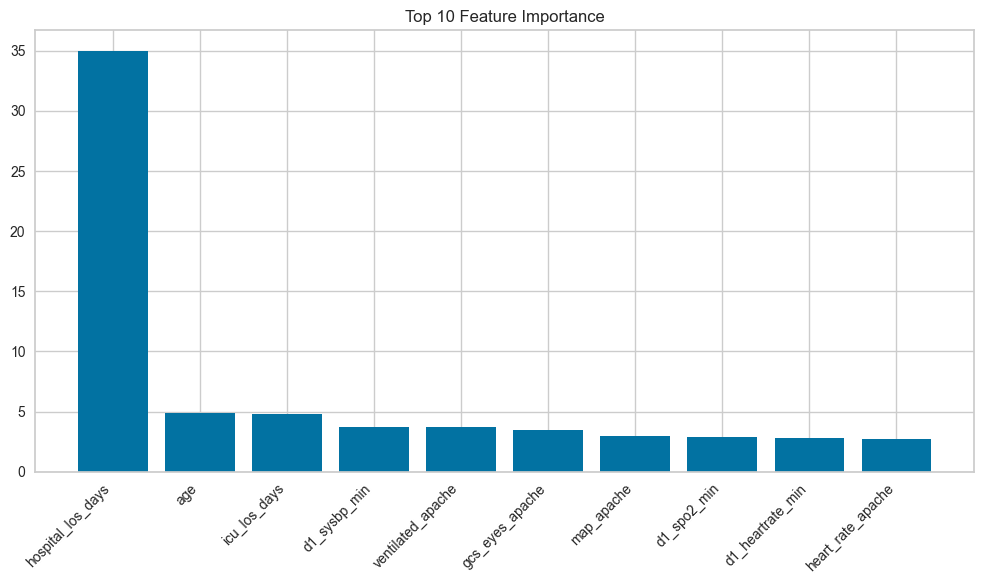

In [27]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'icu_death' is your target variable
X = df.drop('icu_death', axis=1)
y = df['icu_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation on the training set
cv_results = cross_validate(CatBoostClassifier(), X_train_scaled, y_train, scoring=scoring, cv=5)

# Print cross-validation results
print("Cross-validation results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"Precision: {cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}")

# Train the CatBoost model on the entire training set
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    random_seed=42,
    verbose=False  # Do not print training progress
)
catboost_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation results
print("\nTest set evaluation results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Feature importance
feature_importance = catboost_model.feature_importances_
feature_names = X.columns
for i, (importance, name) in enumerate(sorted(zip(feature_importance, feature_names), reverse=True)[:10]):
    print(f"Feature {i+1}: {name} - Importance: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(10), sorted(feature_importance, reverse=True)[:10])
plt.xticks(range(10), [feature_names[i] for i in np.argsort(feature_importance)[::-1][:10]], rotation=45, ha='right')
plt.title("Top 10 Feature Importance")
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Assuming 'icu_death' is your target variable
X = df.drop('icu_death', axis=1)
y = df['icu_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation results
print("\nTest set evaluation results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Epoch 1/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.9393 - loss: 0.4172
Epoch 2/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.9427 - loss: 0.2195
Epoch 3/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9428 - loss: 0.2195
Epoch 4/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.9438 - loss: 0.2165
Epoch 5/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9459 - loss: 0.2109
Epoch 6/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9428 - loss: 0.2195
Epoch 7/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.9455 - loss: 0.2117
Epoch 8/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9454 - loss: 0.2123
Epoch 9/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.9413 - loss: 0.2235
Epoch 10/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.9441 - loss: 0.2155
Epoch 11/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9429 - loss: 0.2192
Epoch 12/50
925/925 ━━━━━━━━━━

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Assuming 'icu_death' is your target variable
X = df.drop('icu_death', axis=1)
y = df['icu_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
"""try train your model on best hyperparameters"""
# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Perform cross-validation on the best model
cv_results = cross_validate(best_model, X_train_scaled, y_train, scoring=['accuracy', 'precision', 'recall'], cv=5)

# Print cross-validation results
print("Cross-validation results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"Precision: {cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}")

# Train the best model on the entire training set
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation results
print("\nTest set evaluation results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Note: Feature importance section has been removed.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Cross-validation results:
Accuracy: 0.9835 ± 0.0011
Precision: 0.8540 ± 0.0121
Recall: 0.8534 ± 0.0130

Test set evaluation results:
Accuracy: 0.9804
Precision: 0.8368
Recall: 0.8599


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Assuming 'icu_death' is your target variable
X = df.drop('icu_death', axis=1)
y = df['icu_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Set up StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform cross-validation
cv_results = cross_validate(xgb_model, X_train_scaled, y_train, scoring=['accuracy', 'precision', 'recall'], cv=stratified_kfold)

# Print cross-validation results
print("Cross-validation results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"Precision: {cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}")

# Train the model on the entire training set
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation results
print("\nTest set evaluation results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Cross-validation results:
Accuracy: 0.9820 ± 0.0012
Precision: 0.8373 ± 0.0099
Recall: 0.8553 ± 0.0160

Test set evaluation results:
Accuracy: 0.9827
Precision: 0.8472
Recall: 0.8551


In [ ]:
'''light gradient(lgbm)
catboost_model
xgboost
randomforest


GridSearchCV : provide range make list for diffrenet learning rate 
find best learning rate and other parameters 
target recall 89%''''




In [16]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
# Assuming 'icu_death' is your target variable
X = df.drop('icu_death', axis=1)
y = df['icu_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:

# Create a RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Define the grid search parameters
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Apply grid search with cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')
grid_search_rf.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters for RandomForest:")
print(grid_search_rf.best_params_)

# Evaluate the model with the best parameters
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation metrics
print("\nEvaluation metrics with best parameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Create a CatBoost model






Best parameters for RandomForest:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Evaluation metrics with best parameters:
Accuracy: 0.9788
Precision: 0.8520
Recall: 0.8068


In [28]:
catboost_model = CatBoostClassifier(random_state=42)

# Define the grid search parameters
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5],
}

# Apply grid search with cross-validation
grid_search_catboost = GridSearchCV(catboost_model, param_grid, cv=5, scoring='recall')
grid_search_catboost.fit(X_train_scaled, y_train,verbose=0)

# Print the best parameters and evaluation metrics
print("Best parameters for CatBoost:")
print(grid_search_catboost.best_params_)

# Evaluate the model with the best parameters
best_model = grid_search_catboost.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nEvaluation metrics with best parameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Best parameters for CatBoost:
{'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.05}

Evaluation metrics with best parameters:
Accuracy: 0.9816
Precision: 0.8497
Recall: 0.8641


In [18]:
# Create a LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42,verbosity=-1)

# Define the grid search parameters
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
}

# Apply grid search with cross-validation
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid, cv=5, scoring='recall')
grid_search_lgbm.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters for LightGBM:")
print(grid_search_lgbm.best_params_)


# Evaluate the model with the best parameters
best_model = grid_search_lgbm.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nEvaluation metrics with best parameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Best parameters for LightGBM:
{'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 10}

Evaluation metrics with best parameters:
Accuracy: 0.9809
Precision: 0.8340
Recall: 0.8747


In [19]:
# Create a XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the grid search parameters
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

# Apply grid search with cross-validation
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='recall')
grid_search_xgb.fit(X_train_scaled, y_train,verbose=0)

# Print the best parameters
print("Best parameters for XGBoost:")
print(grid_search_xgb.best_params_)

# Evaluate the model with the best parameters
best_model = grid_search_xgb.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nEvaluation metrics with best parameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Best parameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1}

Evaluation metrics with best parameters:
Accuracy: 0.9814
Precision: 0.8433
Recall: 0.8684


In [23]:
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import VotingClassifier

# Create a Bagging model
bagging_model = BaggingClassifier(estimator=best_model, n_estimators=10, random_state=42)

# Create a Stacking model
stacking_model = StackingClassifier(classifiers=[best_model, bagging_model], meta_classifier=best_model)

# Create a Blending model
blending_model = EnsembleVoteClassifier(clfs=[best_model, bagging_model], voting='soft')

# Create a Voting model
voting_model = VotingClassifier(estimators=[('best_model', best_model), ('bagging_model', bagging_model)], voting='soft')

# Fit the models
bagging_model.fit(X_train_scaled, y_train)
stacking_model.fit(X_train_scaled, y_train)
blending_model.fit(X_train_scaled, y_train)
voting_model.fit(X_train_scaled, y_train)

# Evaluate the models
y_pred_bagging = bagging_model.predict(X_test_scaled)
y_pred_stacking = stacking_model.predict(X_test_scaled)
y_pred_blending = blending_model.predict(X_test_scaled)
y_pred_voting = voting_model.predict(X_test_scaled)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
accuracy_blending = accuracy_score(y_test, y_pred_blending)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("\nEvaluation metrics with ensemble models:")
print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print(f"Stacking Accuracy: {accuracy_stacking:.4f}")
print(f"Blending Accuracy: {accuracy_blending:.4f}")
print(f"Voting Accuracy: {accuracy_voting:.4f}")




Evaluation metrics with ensemble models:
Bagging Accuracy: 0.9823
Stacking Accuracy: 0.9820
Blending Accuracy: 0.9823
Voting Accuracy: 0.9823


In [25]:
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import VotingClassifier

# Create a Bagging model
bagging_model = BaggingClassifier(estimator=best_model, n_estimators=10, random_state=42)

# Create a Stacking model
stacking_model = StackingClassifier(classifiers=[best_model, bagging_model], meta_classifier=best_model)

# Create a Blending model
blending_model = EnsembleVoteClassifier(clfs=[best_model, bagging_model], voting='soft')

# Create a Voting model
voting_model = VotingClassifier(estimators=[('best_model', best_model), ('bagging_model', bagging_model)], voting='soft')

# Fit the models
bagging_model.fit(X_train_scaled, y_train)
stacking_model.fit(X_train_scaled, y_train)
blending_model.fit(X_train_scaled, y_train)
voting_model.fit(X_train_scaled, y_train)

# Evaluate the models
y_pred_bagging = bagging_model.predict(X_test_scaled)
y_pred_stacking = stacking_model.predict(X_test_scaled)
y_pred_blending = blending_model.predict(X_test_scaled)
y_pred_voting = voting_model.predict(X_test_scaled)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
accuracy_blending = accuracy_score(y_test, y_pred_blending)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

precision_bagging = precision_score(y_test, y_pred_bagging)
precision_stacking = precision_score(y_test, y_pred_stacking)
precision_blending = precision_score(y_test, y_pred_blending)
precision_voting = precision_score(y_test, y_pred_voting)

recall_bagging = recall_score(y_test, y_pred_bagging)
recall_stacking = recall_score(y_test, y_pred_stacking)
recall_blending = recall_score(y_test, y_pred_blending)
recall_voting = recall_score(y_test, y_pred_voting)

print("\nEvaluation metrics with ensemble models:")
print(f"Bagging Accuracy: {accuracy_bagging:.4f}, Precision: {precision_bagging:.4f}, Recall: {recall_bagging:.4f}")
print(f"Stacking Accuracy: {accuracy_stacking:.4f}, Precision: {precision_stacking:.4f}, Recall: {recall_stacking:.4f}")
print(f"Blending Accuracy: {accuracy_blending:.4f}, Precision: {precision_blending:.4f}, Recall: {recall_blending:.4f}")
print(f"Voting Accuracy: {accuracy_voting:.4f}, Precision: {precision_voting:.4f}, Recall: {recall_voting:.4f}")



Evaluation metrics with ensemble models:
Bagging Accuracy: 0.9823, Precision: 0.8478, Recall: 0.8458
Stacking Accuracy: 0.9820, Precision: 0.8391, Recall: 0.8528
Blending Accuracy: 0.9823, Precision: 0.8462, Recall: 0.8481
Voting Accuracy: 0.9823, Precision: 0.8462, Recall: 0.8481


In [24]:
# ... existing imports ...
from sklearn.metrics import f1_score  # Import f1_score for better evaluation

# Create a list to store model names and their accuracies
model_performance = []

# Fit the models
bagging_model.fit(X_train_scaled, y_train)
stacking_model.fit(X_train_scaled, y_train)
blending_model.fit(X_train_scaled, y_train)
voting_model.fit(X_train_scaled, y_train)

# Evaluate the models
y_pred_bagging = bagging_model.predict(X_test_scaled)
y_pred_stacking = stacking_model.predict(X_test_scaled)
y_pred_blending = blending_model.predict(X_test_scaled)
y_pred_voting = voting_model.predict(X_test_scaled)

# Calculate accuracies
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
accuracy_blending = accuracy_score(y_test, y_pred_blending)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Store performance in the list
model_performance.append(('Bagging', accuracy_bagging))
model_performance.append(('Stacking', accuracy_stacking))
model_performance.append(('Blending', accuracy_blending))
model_performance.append(('Voting', accuracy_voting))

# Print evaluation metrics with ensemble models
print("\nEvaluation metrics with ensemble models:")
for model_name, accuracy in model_performance:
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Get the best model based on accuracy
best_model_name, best_accuracy = max(model_performance, key=lambda x: x[1])
print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

KeyboardInterrupt: 

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Assuming 'icu_death' is your target variable
X = df.drop('icu_death', axis=1)
y = df['icu_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
models = {
    'XGBoost': XGBClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Apply bagging to each model
bagging_models = {}
for name, model in models.items():
    bagging_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=42)
    bagging_models[f'Bagging_{name}'] = bagging_model

# Train and evaluate models
results = []
for name, model in bagging_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

# Find the best model
best_model = results_df.loc[results_df['F1 Score'].idxmax()]
print("\nBest Model:")
print(best_model)

ModuleNotFoundError: No module named 'scipy.stats'